# Mini Project 3: Attention mechanism and transfromers

In the dynamic landscape of the media and news industry, the ability to swiftly categorize and curate content has become a strategic imperative. The vast volume of information demands efficient systems to organize and present content to the audience.

The media industry, being the pulse of information dissemination, grapples with the continuous influx of news articles spanning diverse topics. Ensuring that the right articles reach the right audience promptly is not just a logistical necessity but a critical component in retaining and engaging audiences in an age of information overload.

Common Industry Challenges: Amidst the ceaseless flow of news, organizations encounter challenges such as:

Information Overload: The sheer volume of news articles makes manual categorization impractical.
Timeliness: Delays in categorizing news articles can result in outdated or misplaced content.

## Problem definition

E-news Express, a news aggregation startup, faces the challenge of categorizing the news articles collected. With news articles covering sports, entertainment, politics, and more, the need for an advanced and automated system to categorize them has become increasingly evident. The manual efforts required for categorizing such a diverse range of news articles are substantial, and human errors in the categorization of news articles can lead to reputational damage for the startup. There is also the factor of delays and potential inaccuracies. To streamline and optimize this process, the organization recognizes the imperative of adopting cutting-edge technologies, particularly machine learning, to automate and enhance the categorization of content.

As a data scientist on the E-news Express data team, the task is to analyze the text in news articles and build an unsupervised learning model for categorizing them. The categorization done by the model can then be validated against human-defined labels to check the overall accuracy of the AI system. The goal is to optimize the categorization process, ensuring timely and personalized delivery.*

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to compute distances
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

# importing the PyTorch Deep Learning library
import torch

# to import the model
from sentence_transformers import SentenceTransformer

# to cluster the data
from sklearn.cluster import KMeans

# to compute metrics
from sklearn.metrics import classification_report

# to avoid displaying unnecessary warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Intro to LLM and GenAI/Part 3/news_articles.csv")

In [ ]:
df.head()

,Text
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n"
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots

Importing the necessary libraries

In [ ]:
# installing the sentence-transformers library
!pip install -U sentence-transformers -q

In [ ]:
df.shape

(2225, 1)

In [ ]:
df.isnull().sum()

,0
Text,0


In [ ]:
df.describe()

,Text
count,2225
unique,2127
top,"Kenyan school turns to handhelds\n \n At the Mbita Point primary school in western Kenya students click away at a handheld computer with a stylus.\n \n They are doing exercises in their school textbooks which have been digitised. It is a pilot project run by EduVision, which is looking at ways to use low cost computer systems to get up-to-date information to students who are currently stuck with ancient textbooks. Matthew Herren from EduVision told the BBC programme Go Digital how the non-governmental organisation uses a combination of satellite radio and handheld computers called E-slates. ""The E-slates connect via a wireless connection to a base station in the school. This in turn is connected to a satellite radio receiver. The data is transmitted alongside audio signals."" The base station processes the information from the satellite transmission and turns it into a form that can be read by the handheld E-slates. ""It downloads from the satellite and every day processes the stream, sorts through content for the material destined for the users connected to it. It also stores this on its hard disc.""\n \n The system is cheaper than installing and maintaining an internet connection and conventional computer network. But Mr Herren says there are both pros and cons to the project. ""It's very simple to set up, just a satellite antenna on the roof of the school, but it's also a one-way connection, so getting feedback or specific requests from end users is difficult.""\n \n The project is still at the pilot stage and EduVision staff are on the ground to attend to teething problems with the Linux-based system. ""The content is divided into visual information, textual information and questions. Users can scroll through these sections independently of each other."" EduVision is planning to include audio and video files as the system develops and add more content. Mr Herren says this would vastly increase the opportunities available to the students. He is currently in negotiations to take advantage of a project being organised by search site Google to digitise some of the world's largest university libraries. ""All books in the public domain, something like 15 million, could be put on the base stations as we manufacture them. Then every rural school in Africa would have access to the same libraries as the students in Oxford and Harvard"" Currently the project is operating in an area where there is mains electricity. But Mr Herren says EduVision already has plans to extend it to more remote regions. ""We plan to put a solar panel at the school with the base station, have the E-slates charge during the day when the children are in school, then they can take them home at night and continue working."" Maciej Sundra, who designed the user interface for the E-slates, says the project's ultimate goal is levelling access to knowledge around the world. ""Why in this age when most people do most research using the internet are students still using textbooks? The fact that we are doing this in a rural developing country is very exciting - as they need it most.""\n"
freq,2


In [ ]:
df.duplicated().sum()

np.int64(98)

In [ ]:
df.drop_duplicates(inplace=True)

AttributeError: 'NoneType' object has no attribute 'drop_duplicates'

In [ ]:
df.shape

AttributeError: 'NoneType' object has no attribute 'shape'

there are no duplicate values in the data now

In [ ]:
df.iloc[1:2,-1]

,Text
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots, the Royal Highland Fusiliers and the Argyll and Sutherland Highlanders. In October, the Council of Scottish Colonels proposed the merger of the Royal Scots and the King's Own Scottish Borderers into a single battalion.\n \n Under their vision, it would be one of five in the new super regiment. The proposals to either merge or amalgamate the six regiments into a super regiment sparked a political outcry, with Labour backbenchers and opposition politicians opposing the plan. They felt the timing was insensitive because the Black Watch was in the frontline in Iraq, suffering casualties. The Save the Scottish Regiments campaigners were so angered they threatened to stand against Labour at the next general election.\n \n Speaking ahead of the expected Army Board meeting, a spokesman said: ""The government and the Army Board have spent the past four months attempting to trick serving soldiers and the public into thinking their planned changes for the Scottish regiments are for the good of the Army and for that of the serving soldier. ""They are very much not for the good and will destroy Scotland's regiments by moulding them into a single super regiment which will lead to severe recruitment problems, a loss of local connections to those regiments and a loss to Scotland of an important part of her heritage and, most importantly, her future - the regiments are the envy of armies around the world."" An alternative blueprint had been put forward by Labour MP Eric Joyce, who proposed going ahead with the merger while preserving the other regiments. For a brief time, there was speculation the prime minister might consider the plan, but that now seems unlikely. Speaking in Scotland last week, Mr Blair said the aim was to preserve tradition but introduce a more effective structure and hinted that a super regiment was likely. He said: ""They don't want to get rid of the history or the traditions of the regiment or the local connections - far from it, all they want to do is make sure they can transfer people easily across regiments and deploy them more flexibly."" The prime minister said he hoped campaigners' concerns would be taken into account but the need for effective change had to be paramount.\n"


In [ ]:
df.loc[1,'Text']

'Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland\'s Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland\'s six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee\'s decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots, the Royal Highland Fusiliers and the Argyll and Sutherland Highlanders. In October, the Council of Scottish Colonels proposed the merger of the Royal Scots and the King\'s Own Scot

# MODEL BUILDING

Defining the model:
we will be using the **all-MiniLM-L6-V2** model

In [ ]:
!pip install hf_xet

In [ ]:
from sentence_transformers import SentenceTransformer
# definging the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
#setting the device to GPU if available, else CPU
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
df.reset_index(inplace=True, drop=True)
embedding_matrix = model.encode(df['Text'], show_progress_bar = True, device = device)
embedding_matrix.shape

AttributeError: 'NoneType' object has no attribute 'reset_index'

In [ ]:
# defining a function to compute the cosine similarity between two embedding vectors
def cosine_score(text1,text2):
    # encoding the text
    embeddings1 = model.encode(text1)
    embeddings2 = model.encode(text2)

    # calculating the L2 norm of the embedding vector
    norm1 = np.linalg.norm(embeddings1)
    norm2 = np.linalg.norm(embeddings2)

    # computing the cosine similarity
    cosine_similarity_score = ((np.dot(embeddings1,embeddings2))/(norm1*norm2))

    return cosine_similarity_score


In [ ]:
a= "i love apple"
b= "apple is a fruit"
c= "i like this table"
print(cosine_score(a,b))
print(cosine_score(b,c))
print(cosine_score(a,c))


0.55750245
0.07198224
0.27396196


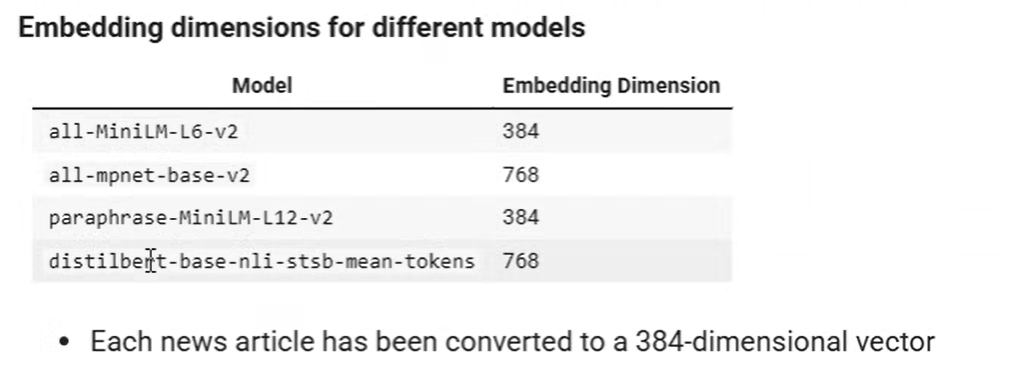

In [ ]:
# We can also use prebuilt method to calculate similarity score

a= "i love apple"
b= "apple is a fruit"
c= "i like this table"

from sentence_transformers import util

embeddings1 = model.encode(a)
embeddings2 = model.encode(b)
embeddings3 = model.encode(c)

print(util.cos_sim(embeddings1, embeddings2))
print(util.cos_sim(embeddings2, embeddings3))
print(util.cos_sim(embeddings1, embeddings3))


tensor([[0.5575]])
tensor([[0.0720]])
tensor([[0.2740]])


In [ ]:
# defining a function to find the top k similar sentences for a given query
def top_k_similar_sentences(embedding_matrix, query_text, k):
    # encoding the query text
    query_embedding = model.encode(query_text)

    # calculating the cosine similarity between the query vector and all other encoded vectors of our dataset
    score_vector = np.dot(embedding_matrix,query_embedding)

    # sorting the scores in descending order and choosing the first k
    top_k_indices = np.argsort(score_vector)[::-1][:k]

    # returning the corresponding reviews
    return df.loc[list(top_k_indices), 'Text']


In [ ]:
# defining the query text
query_text = "Budget for elections"

# displaying the top 5 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 5)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")


'Debate needed' on donations cap
 
 A cap on donations to political parties should not be introduced yet, the elections watchdog has said.
 
 Fears that big donors can buy political favours have sparked calls for a limit. In a new report, the Electoral Commission says it is worth debating a Â£10,000 cap for the future but now is not the right time to introduce it. It also says there should be more state funding for political parties and candidates should be able to spend more on election campaigning.
 
 There were almost Â£68m in reported donations to political parties in 2001, 2002 and 2003, with nearly Â£12m of them from individual gifts worth more than Â£1m. The rules have already been changed so the public can see who gives how much to the parties but the report says there are still public suspicions. The commission says capping donations would mean taxpayers giving parties more cash - something which would first have to be acceptable to the public and shown to work. "While we are 

In [ ]:
# defining the query text
query_text = "High imports and exports"

# displaying the top 5 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 5)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")


US trade gap ballooned in October
 
 The US trade deficit widened by more than expected in October, hitting record levels after higher oil prices raised import costs, figures have shown
 
 The trade shortfall was $55.5bn (Â£29bn), up 9% from September, the Commerce Department said. That pushed the 10 month deficit to $500.5bn. Imports rose by 3.4%, while exports increased by only 0.6%. A weaker dollar also increased the cost of imports, though this should help drive export demand in coming months. "Things are getting worse, but that's to be expected," said David Wyss of Standard & Poor's in New York. "The first thing is that when the dollar goes down, it increases the price of imports. "We are seeing improved export orders. Things seem to be going in the right direction."
 
 Despite this optimism, significant concerns remain as to how the US will fund its trade and budget deficits should they continue to widen. Another problem highlighted by analysts was the growing trade gap with Chin

In [ ]:
meanDistortions = []
clusters = range(2, 11)

for k in clusters:
    clusterer = KMeans(n_clusters=k, random_state=1)
    clusterer.fit(embedding_matrix)

    prediction = clusterer.predict(embedding_matrix)

    distortion = sum(
        np.min(cdist(embedding_matrix, clusterer.cluster_centers_, "euclidean"), axis=1) ** 2
    )
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)


Number of Clusters: 2 	Average Distortion: 1881.4195924544215
Number of Clusters: 3 	Average Distortion: 1821.1271911665126
Number of Clusters: 4 	Average Distortion: 1761.7262400829645
Number of Clusters: 5 	Average Distortion: 1696.0629242481298
Number of Clusters: 6 	Average Distortion: 1665.6775269598238
Number of Clusters: 7 	Average Distortion: 1647.8738356801293
Number of Clusters: 8 	Average Distortion: 1624.7586661785442
Number of Clusters: 9 	Average Distortion: 1609.120161805324
Number of Clusters: 10 	Average Distortion: 1587.0039521597828


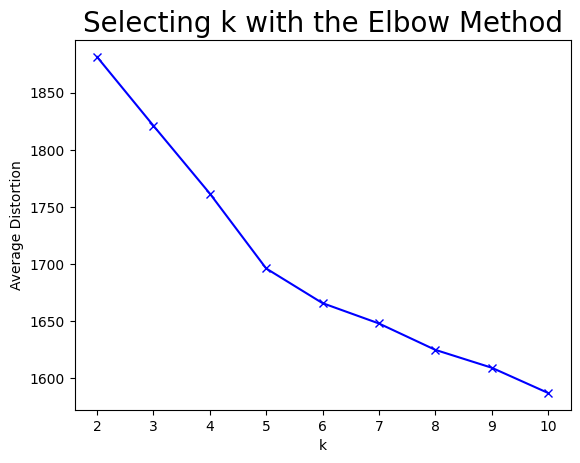

In [ ]:
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

In [ ]:
sil_score = []
cluster_list = range(2, 11)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    preds = clusterer.fit_predict((embedding_matrix))

    score = silhouette_score(embedding_matrix, preds)
    sil_score.append(score)

    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))


For n_clusters = 2, the silhouette score is 0.04670984670519829)
For n_clusters = 3, the silhouette score is 0.053876843303442)
For n_clusters = 4, the silhouette score is 0.05920078977942467)
For n_clusters = 5, the silhouette score is 0.0676974430680275)
For n_clusters = 6, the silhouette score is 0.06136532872915268)
For n_clusters = 7, the silhouette score is 0.059658389538526535)
For n_clusters = 8, the silhouette score is 0.05800066515803337)
For n_clusters = 9, the silhouette score is 0.05950848013162613)
For n_clusters = 10, the silhouette score is 0.06420844793319702)


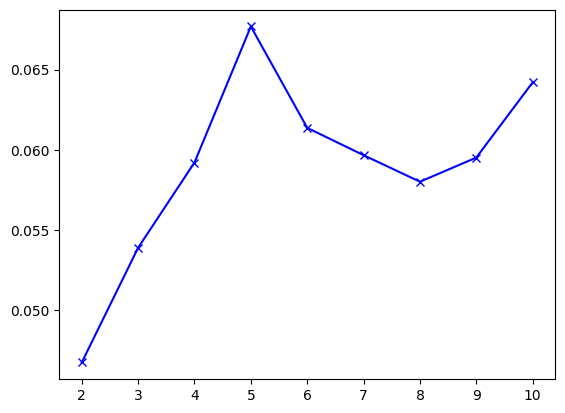

In [ ]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()

In [ ]:
# defining the number of clusters/categories
n_categories = 5

# fitting the model
Kmeans=KMeans(n_clusters=n_categories,random_state=1).fit(embedding_matrix)

In [ ]:
# creating a copy of the data
clustered_data = df.copy()

# assigning the cluster/category labels
clustered_data['Category'] = Kmeans.labels_

clustered_data.head()

,Text,Category
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",1
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the 

In [ ]:
# for each cluster, printing the 5 random news articles
for i in range(5):
    print("CLUSTER",i)
    print(clustered_data.loc[clustered_data.Category == i, 'Text'].sample(5, random_state=1).values)
    print("*****************************************************************")
    print("\n")

CLUSTER 0
['India to deport Bollywood actress\n \n India has ordered the deportation of Iranian-born model and actress Negar Khan to Norway after saying she was working illegally on her visa.\n \n Khan has had raunchy roles in music videos and Bollywood films over the past two years. The distressed actress told media she was being driven straight to the airport after a routine appointment at the Bombay immigration office. Immigration officials said she had been warned about her visa last year.\n \n Khan told an Indian news channel on her mobile phone: "They are not even letting me go home to get my bags. I have no clothes or money on me. "They did not give me any notice. I don\'t know why they are taking me away like this. There is nothing wrong with my visa. It says I work here... They are not allowing me to even call a lawyer." Bipin Bihari, deputy police chief in Bombay, said Khan was being sent back to Norway, from which she holds a passport, on the first available flight. "She was

In [ ]:
# dictionary of cluster label to category
category_dict = {
    0: 'Sports',
    1: 'Politics',
    2: 'Entertainment',
    3: 'Business',
    4: 'Technology'
}
# mapping cluster labels to categories
clustered_data['Category'] = clustered_data['Category'].map(category_dict)

clustered_data.head()

,Text,Category
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",Politics
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderer

In [ ]:
# loading the actual labels
labels = pd.read_csv("/content/drive/MyDrive/Intro to LLM and GenAI/Part 3/news_article_labels.csv")
# checking the unique labels
labels['Label'].unique()

array(['Politics', 'Sports', 'Technology', 'Entertainment', 'Business'],
      dtype=object)

In [ ]:
# adding the actual categories to our dataframe
clustered_data['Actual Category'] = labels['Label'].values

ValueError: Length of values (2127) does not match length of index (2225)

In [ ]:
print(classification_report(clustered_data['Actual Category'], clustered_data['Category']))